In [64]:
# Importing needed modules for handling tabular data, plotting, and accessing common ML
import os 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

import seaborn as sns

from sklearn.compose import ColumnTransformer 
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

pd.set_option("display.max_rows", None)

In [65]:
# Providing Data Paths
curr_path = os.getcwd()
dataset_src = os.path.join(curr_path, 'dataset')
train_path = os.path.join(dataset_src, 'train.csv')
test_path = os.path.join(dataset_src, 'test.csv')

In [66]:
# Reading data and converting it to Pandas Dataframe
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

In [67]:
# Having a look on our data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [68]:
# Checking info
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [69]:
# Function for missing values heatmap
def plot_missing_data(dataset, title):
    fig, ax = plt.subplots(figsize = (5,5))
    plt.title(title)
    sns.heatmap(dataset.isnull(), cbar = False)

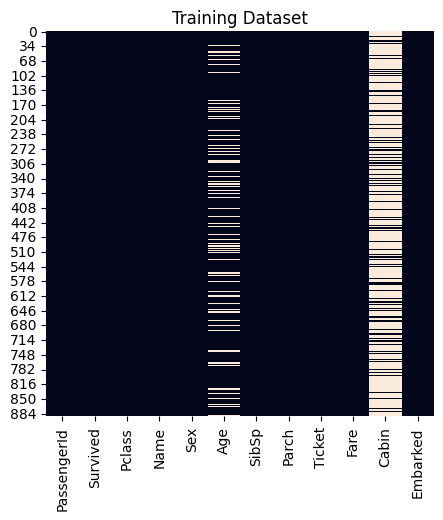

In [70]:
plot_missing_data(train_df, "Training Dataset")

In [71]:
train_df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [72]:
train_df["Survived"].value_counts(normalize = True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [73]:
def bar_chart_stacked(dataset, feature, stacked = True):
    survived = dataset[dataset["Survived"] == 1][feature].value_counts()
    dead = dataset[dataset["Survived"] == 0][feature].value_counts()
    df_survived_dead = pd.DataFrame([survived, dead])
    df_survived_dead.index = ["Passengers Survived", "Passengers Died"]
    ax = df_survived_dead.plot(kind = "bar", stacked = stacked, figsize = (5,5))

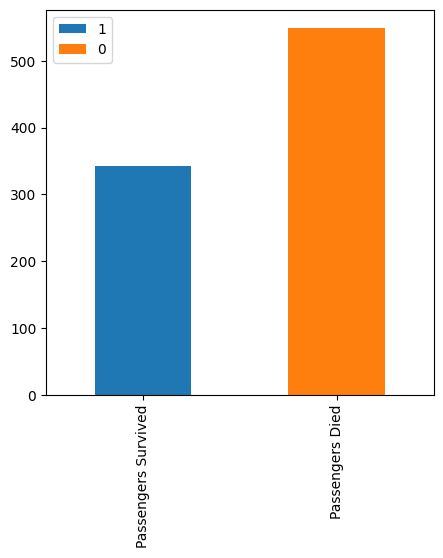

In [74]:
bar_chart_stacked(train_df, "Survived")

In [75]:
train_df["Sex"].value_counts().to_frame()

,Sex
male,577
female,314


In [76]:
train_df.groupby("Sex").Survived.mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

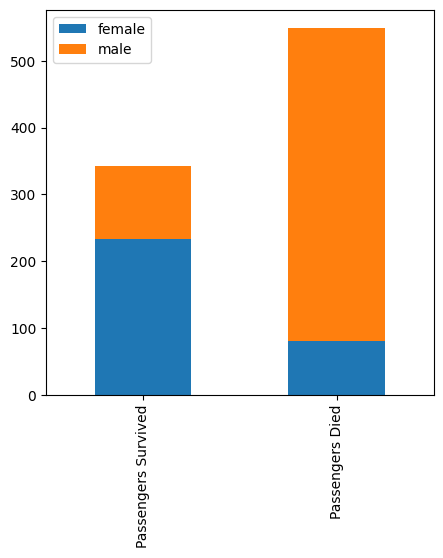

In [77]:
bar_chart_stacked(train_df, "Sex")

In [78]:
pd.pivot_table(train_df, index = "Survived", columns = "Pclass", values = "Ticket", aggfunc = "count")

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [79]:
train_df.groupby("Pclass").Survived.mean().to_frame()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


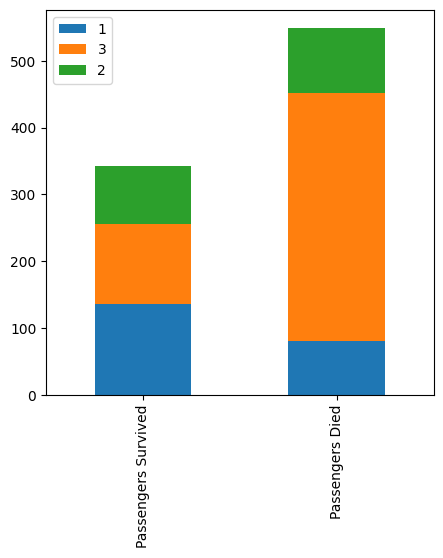

In [80]:
bar_chart_stacked(train_df, "Pclass")

In [81]:
def bar_chart_compare(dataset, feature1, feature2 = None, ftitle = None):
    plt.figure(figsize = [5,5])
    plt.title(ftitle)
    g = sns.barplot(x = feature1, y = "Survived", hue = feature2, errorbar=None, data = dataset).set_ylabel("Survival rate")

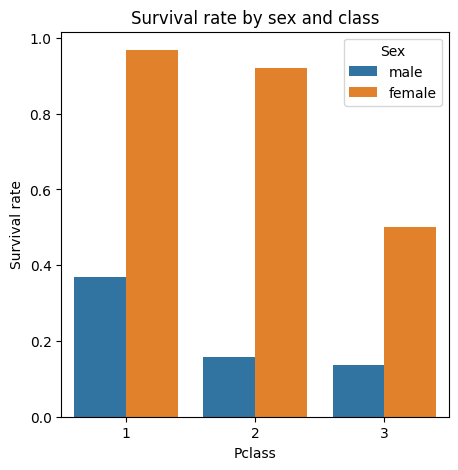

In [82]:
bar_chart_compare(train_df, "Pclass", "Sex", "Survival rate by sex and class")

In [83]:
train_df.groupby(["Pclass", "Sex"]).Survived.mean().to_frame()

Survived
Pclass Sex             
1      female  0.968085
       male    0.368852
2      female  0.921053
       male    0.157407
3      female  0.500000
       male    0.135447

In [84]:
def plot_distribution(dataset, feature, title, bins = 30, hist = True, fsize = (5,5)):
    fig, ax = plt.subplots(figsize = fsize)
    ax.set_title(title)
    sns.histplot(dataset[feature], color = "g", bins = bins, ax = ax)

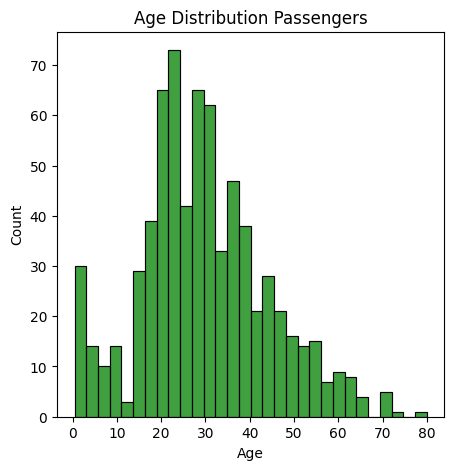

In [85]:
plot_distribution(train_df, "Age", "Age Distribution Passengers")

In [86]:
def plot_kernel_density_estimate_survivors(dataset, feature1, title, fsize = (5,5)):
    fig, ax = plt.subplots(figsize = fsize)
    ax.set_title(title)
    sns.kdeplot(dataset[feature1].loc[train_df["Survived"] == 1], fill = True, ax = ax, label = "Survived").set_xlabel(feature1)
    sns.kdeplot(dataset[feature1].loc[train_df["Survived"] == 0], fill = True, ax = ax, label = "Died")
    ax.legend()

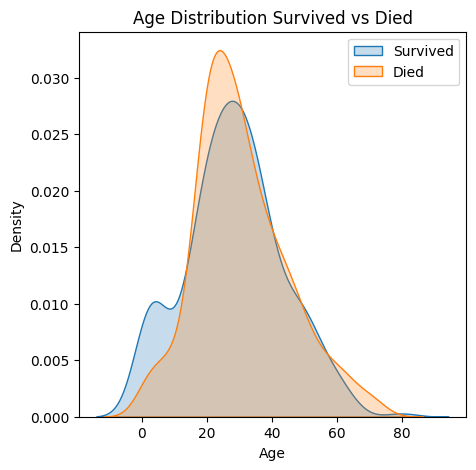

In [87]:
plot_kernel_density_estimate_survivors(train_df, "Age", "Age Distribution Survived vs Died")

In [88]:
def plot_swarm_survivors(dataset, feature1, feature2, title, fsize = (155)):
    fig, ax = plt.subplots(figsize = (18,5))
    ax.grid(True)
    plt.xticks(list(range(0,100,2)))
    sns.swarmplot(y = feature1, x = feature2, hue = "Survived", data = dataset).set_title(title)

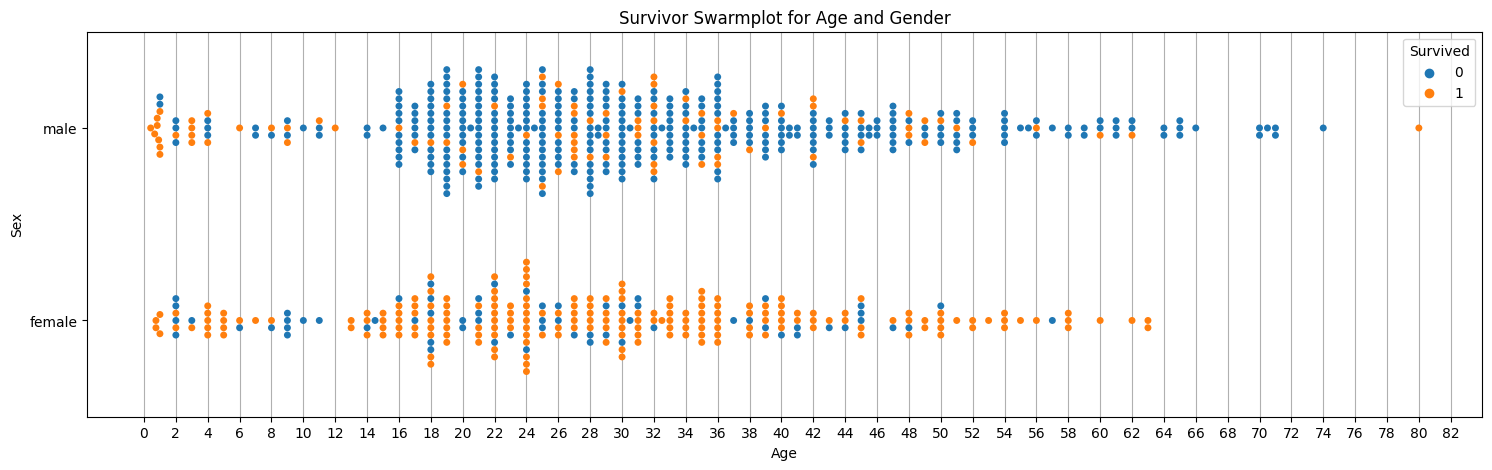

In [89]:
plot_swarm_survivors(train_df, "Sex", "Age", "Survivor Swarmplot for Age and Gender")

In [90]:
def plot_swarm_survivors2(dataset, feature1, feature2, title, fsize = (155)):
    fig, ax = plt.subplots(figsize = (18,5))
    ax.grid(True)
    sns.swarmplot(y = feature1, x = feature2, hue = "Survived", data = dataset).set_title(title)

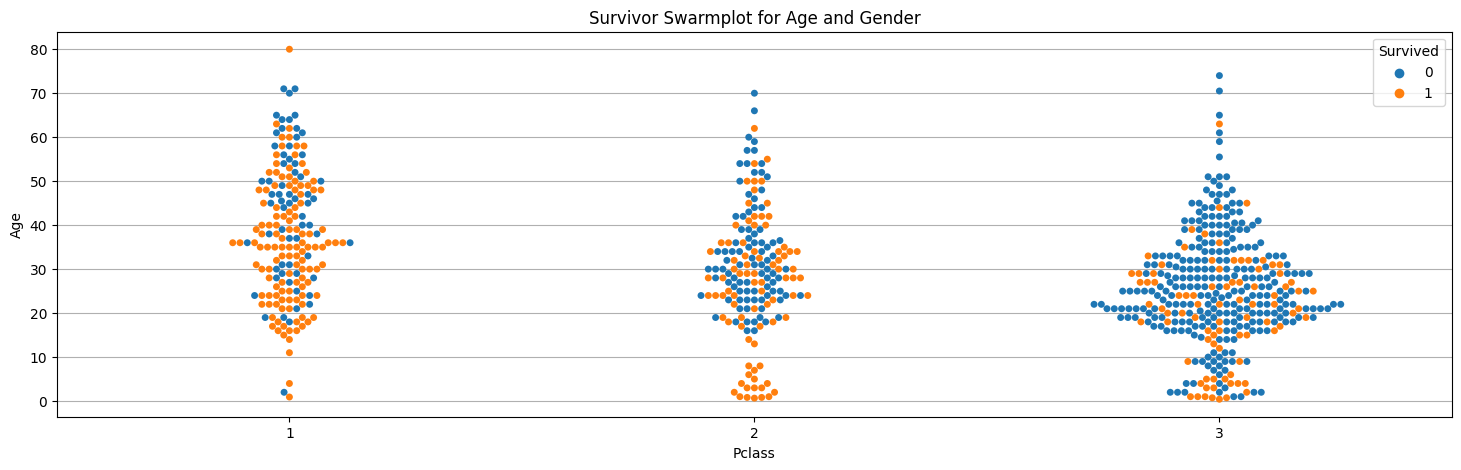

In [91]:
plot_swarm_survivors2(train_df, "Age", "Pclass","Survivor Swarmplot for Age and Gender")

In [92]:
train_df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

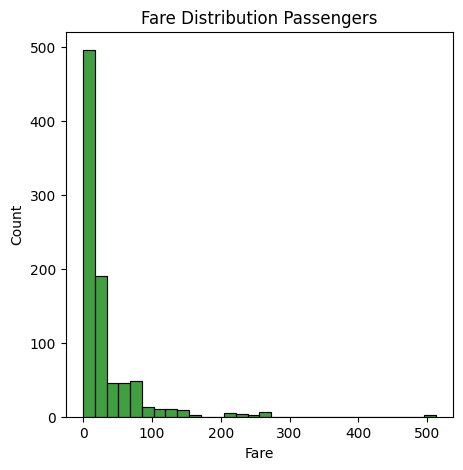

In [93]:
plot_distribution(train_df, "Fare", "Fare Distribution Passengers")

In [94]:
def plot_quartiles(dataset, feature, title, categories):
    fig, ax = plt.subplots(figsize = (5,5))
    fare_ranges = pd.qcut(dataset[feature], len(categories), labels = categories)
    ax.set_title(title)
    sns.barplot(x = fare_ranges, y = dataset.Survived, fill = None, ax = ax).set_ylabel("Survival rate")

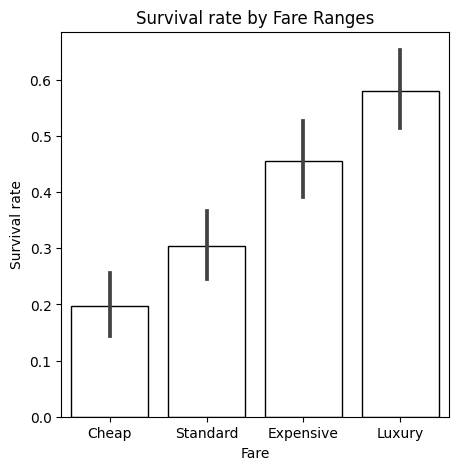

In [95]:
categories = ["Cheap", "Standard", "Expensive", "Luxury"]

plot_quartiles(train_df, "Fare", "Survival rate by Fare Ranges", categories)

In [96]:
train_df.loc[train_df.Fare == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


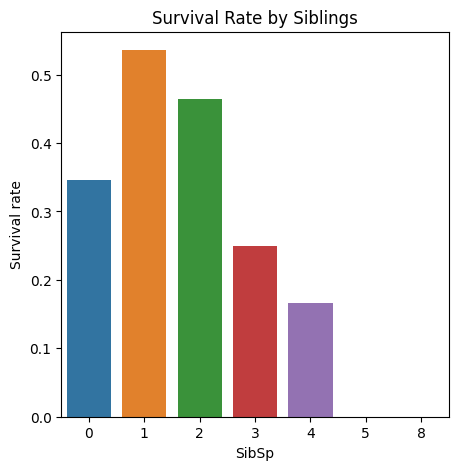

In [97]:
bar_chart_compare(train_df, "SibSp", ftitle= "Survival Rate by Siblings")

In [98]:
def show_countplot(dataset, feature, title, fsize = (5,5)):
    fig, ax = plt.subplots(figsize = fsize)
    sns.countplot(dataset[feature], ax = ax).set_title(title)

def show_compare_countplot(dataset, feature1, feature2, title):
    fig, ax = plt.subplots(figsize = (5,5))
    p = sns.countplot(x = feature1, hue = feature2, data = dataset, ax = ax).set_title(title)

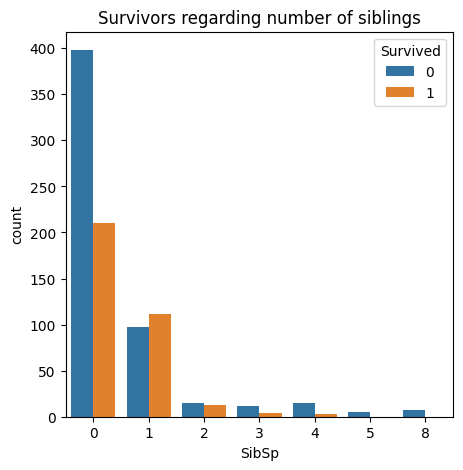

In [99]:
show_compare_countplot(train_df, "SibSp", "Survived", "Survivors regarding number of siblings")

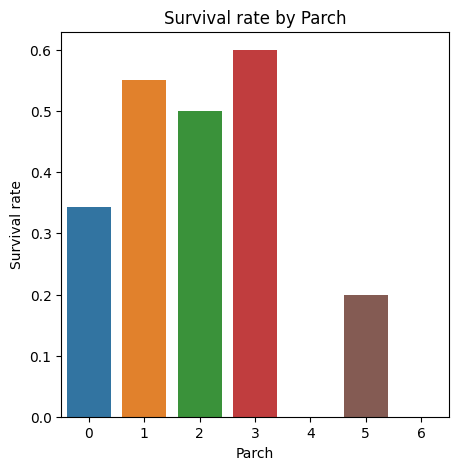

In [102]:
bar_chart_compare(train_df, "Parch", ftitle = "Survival rate by Parch")

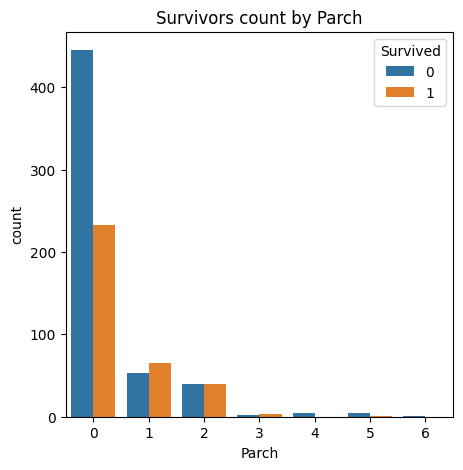

In [103]:
show_compare_countplot(train_df, "Parch", "Survived", "Survivors count by Parch")

In [104]:
pd.unique(train_df["Name"])

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

In [119]:
train_df["Title"] = train_df["Name"].apply(lambda x: x.split(",")[1].split(".")[0].strip())
test_df["Title"] = test_df["Name"].apply(lambda x: x.split(",")[1].split(".")[0].strip())

In [120]:
train_df["Title"].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

In [121]:
train_df["Title"].replace(["the Countess", "Ms", "Lady", "Mlle", "Mme"], "Mrs", inplace= True)
train_df["Title"].replace(["Major", "Col", "Capt", "Sir", "Don", "Jonkheer"], "Mr", inplace= True)
test_df["Title"].replace(["the Countess", "Ms", "Lady", "Mlle", "Mme"], "Mrs", inplace= True)
test_df["Title"].replace(["Major", "Col", "Capt", "Sir", "Don", "Jonkheer"], "Mr", inplace= True)

In [122]:
train_df["Title"].value_counts()

Mr        525
Miss      182
Mrs       131
Master     40
Dr          7
Rev         6
Name: Title, dtype: int64

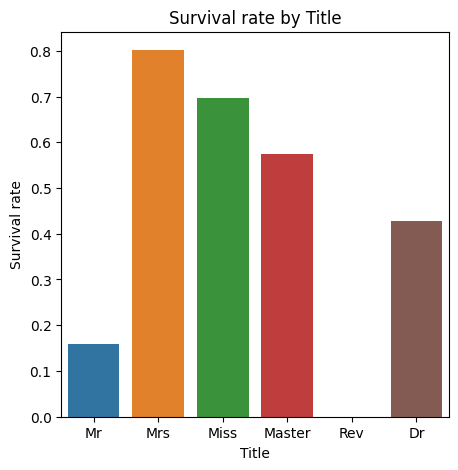

In [123]:
bar_chart_compare(train_df, "Title", ftitle= "Survival rate by Title")

In [140]:
train_df["Ticket_2letter"] = train_df.Ticket.apply(lambda x: x[:2])
test_df["Ticket_2letter"] = test_df.Ticket.apply(lambda x: x[:2])

train_df["Ticket_len"] = train_df.Ticket.apply(lambda x: len(x))
test_df["Ticket_len"] = test_df.Ticket.apply(lambda x: len(x))

train_df["Cabin_num"] = train_df.Ticket.apply(lambda x: len(x.split()))
test_df["Cabin_num"] = test_df.Ticket.apply(lambda x: len(x.split()))

train_df["Cabin_1letter"] = train_df.Ticket.apply(lambda x: x[:1])
test_df["Cabin_1letter"] = test_df.Ticket.apply(lambda x: x[:1])

In [141]:
train_df["Fam_size"] = train_df["SibSp"] + train_df["Parch"] + 1
test_df["Fam_size"] = test_df["SibSp"] + test_df["Parch"] + 1

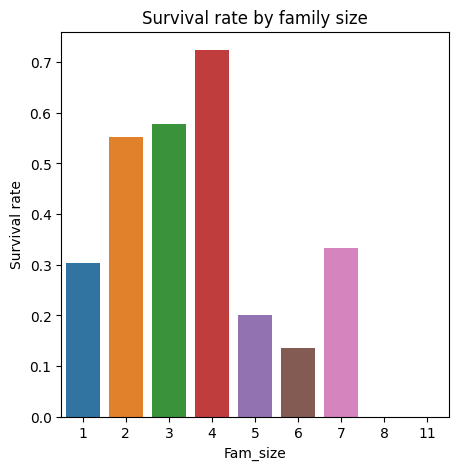

In [142]:
bar_chart_compare(train_df, "Fam_size", ftitle="Survival rate by family size")

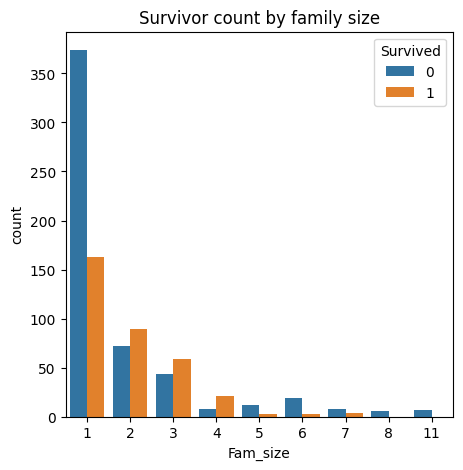

In [143]:
show_compare_countplot(train_df, "Fam_size", "Survived", "Survivor count by family size")

In [144]:
train_df["Fam_type"] = pd.cut(train_df.Fam_size, [0, 1, 4, 7, 11], labels=["Solo", "Small", "Big", "Very Big"])
test_df["Fam_type"] = pd.cut(test_df.Fam_size, [0, 1, 4, 7, 11], labels=["Solo", "Small", "Big", "Very Big"])

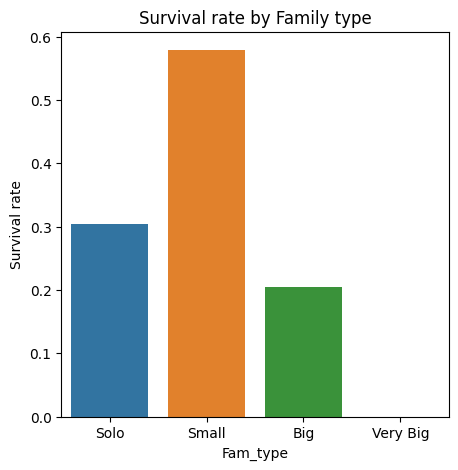

In [145]:
bar_chart_compare(train_df, "Fam_type", ftitle="Survival rate by Family type")

In [146]:
y = train_df["Survived"]
features = ["Pclass", "Fare", "Title", "Embarked", "Fam_type", "Ticket_len", "Ticket_2letter"]
X = train_df[features]
X.head()

,Pclass,Fare,Title,Embarked,Fam_type,Ticket_len,Ticket_2letter
0,3,7.2500,Mr,S,Small,9,A/
1,1,71.2833,Mrs,C,Small,8,PC
2,3,7.9250,Miss,S,Solo,16,ST
3,1,53.1000,Mrs,S,Small,6,11
4,3,8.0500,Mr,S,Solo,6,37


In [150]:
numerical_cols = ["Fare"]
categorical_cols = ["Pclass", "Title", "Embarked", "Fam_type", "Ticket_len", "Ticket_2letter"]

numerical_transformer = SimpleImputer(strategy="median")

categorical_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="most_frequent")), 
                                          ("onehot", OneHotEncoder(handle_unknown="ignore"))
                                          ])
preprocessor = ColumnTransformer(transformers=[("num", numerical_transformer, numerical_cols),
                                               ("cat", categorical_transformer, categorical_cols)
                                               ])
titanic_pipline = Pipeline(steps=[("preprocessor", preprocessor),
                                  ("model", RandomForestClassifier(random_state=0, n_estimators=500, max_depth=5))
                                  ])
titanic_pipline.fit(X, y)

print("Cross validation score: {:.3f}".format(cross_val_score(titanic_pipline, X, y, cv = 10).mean()))

Cross validation score: 0.825


In [151]:
X_test = test_df[features]
X_test.head()

,Pclass,Fare,Title,Embarked,Fam_type,Ticket_len,Ticket_2letter
0,3,7.8292,Mr,Q,Solo,6,33
1,3,7.0000,Mrs,S,Small,6,36
2,2,9.6875,Mr,Q,Solo,6,24
3,3,8.6625,Mr,S,Solo,6,31
4,3,12.2875,Mrs,S,Small,7,31


In [156]:
predictions = titanic_pipline.predict(X_test)

In [159]:
output = pd.DataFrame({"PassengerId": test_df.PassengerId, "Survived": predictions})
output.to_csv("submission.csv", index = False)
print("Your submission was successful")

Your submission was successful
